# Foreword

For the purpose of Data Science Special Syllabus Report, I am going to use the data from Robot Field for the year 2020. Following is a summary of the field and the dates when the data was collected from the field.


Date of data collections  
Subvplots in the field  
Distribution of dates in the season  
Days to heading  
Days to maturity  
Sowing dates  

# Preprocessing

In [36]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import math
import os
import datetime
from copy import copy
import pprint # pretty print
import time

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# To display df nicely in loops
from IPython.display import display 
# display(df1.head()) 
# display(df2.head())

# Display rows and columns Pandas
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',50)

In [37]:
# Prints the current workinig directory
os.getcwd()
# os.listdir()

'C:\\Users\\fahad\\Documents\\GitHub\\vPheno\\DS Special Syllabus Report\\Code'

## Importing Data

In [40]:
path = './Data/'
list_data = os.listdir(path)
os.listdir(path)

['raw',
 'Robot_2020_mean_fixed_rows.csv',
 'Robot_2020_median_fixed_rows.csv',
 'Robot_2020_stdev_fixed_rows.csv',
 'Robot_fixed_cols.csv']

In [41]:
import_data = []
for csv_data in tqdm(list_data, desc="hello", unit="files"):
    if os.path.isfile(os.path.join(path, csv_data)):
        df_name = csv_data[:-4]
        import_data.append(df_name)

        locals()[df_name] = pd.read_csv(path+csv_data)
        print(df_name, '=====', locals()[df_name].shape)
    

hello: 100%|███████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 27.10files/s]

Robot_2020_mean_fixed_rows ===== (96, 114)
Robot_2020_median_fixed_rows ===== (96, 114)
Robot_2020_stdev_fixed_rows ===== (96, 114)
Robot_fixed_cols ===== (1344, 29)


# Using the median fixed rows dataset

In [5]:
df = Robot_2020_median_fixed_rows.copy()

In [6]:
# ToDo: Add check for duplicate columns in the df

general_col_names = ['Plot_ID', 'Blue', 'Green', 'Red', 'RedEdge', 'NIR', 'NDVI', 'MTCI', 'EVI']

# list_agg_df
yield_cols = ['GrainYield', 'Days2Heading', 'Days2Maturity']
id_cols_new = ['Plot_ID']

# Counter for location of column in columns list
loc = 0

# Dict for saving the name and location of the yield column
loc_yield_cols = {}

for cols in df.columns.tolist():
    for y_col in yield_cols:
        if not cols.find(y_col):
            loc_yield_cols[cols] = loc
            print(f'\"{cols}\" column in features_df seems like the yield column as it contains the text \"{y_col}\". It is located at location {loc}')
    loc += 1

yield_cols_found = list(loc_yield_cols.keys())
target_cols=yield_cols_found[0]

"GrainYield_180620" column in features_df seems like the yield column as it contains the text "GrainYield". It is located at location 9


# Integrating the data from different dates using simpsonian integration

In [7]:
from scipy.integrate import simps
from numpy import trapz

In [8]:
sowing = '200420'
sowing_date = datetime.datetime.strptime(sowing, '%d%m%y').date()
sowing_date

datetime.date(2020, 4, 20)

In [9]:
df_aoc = df[id_cols_new+yield_cols_found]
# Renaming Grain_Yield Column #custom
df_aoc.columns = [df_aoc.columns[0]]+['GrainYield']
df_aoc.head(2)

,Plot_ID,GrainYield
0,1101,453.658537
1,1102,439.024390


## Expermienting with different integration methods to find AOC

In [10]:
# sample_entry =[]
# list_s = []
# list_trap = []
# list_simp = []
# list_saha = []

# for sample in range(df.shape[0]):
#     temp_cols = [x for x in df.columns if 'NIR' in x]

#     temp_entries= [df[x][sample] for x in temp_cols]
#     temp_dates = [datetime.datetime.strptime(date.split('_')[1], '%d%m%y').date() for date in temp_cols]
#     days_sow = [(x-sowing_date).days for x in temp_dates]

#     # df[[x for x in df.columns if 'NIR' in x]]
#     plt.plot(days_sow, temp_entries)
    
#     data={'x':x,'y':y }
#     ACC=[]
#     A=pd.DataFrame(data, columns=['x','y'])
#     AA=0
#     for item in range(A.shape[0]-1):
#         Ans=(float((A['y'][item]))+float((A['y'][item+1])))*((float((A['x'][item+1]))-float((A['x'][item]))))/2
#         AA+=Ans
# #         print(AA)
#         ACC.append(AA)
#     list_saha.append(AA)
    
#     x=np.array(days_sow)
#     y=np.array(temp_entries)
#     s = np.sum((x[1:] - x[:-1]) * (y[1:] + y[:-1]) / 2)
    
    
    
#     list_s.append(s)
#     list_trap.append(trapz(y,x))
#     list_simp.append(simps(y,x))
#     sample_entry.append(df[temp_cols[0]][sample])
    
# #     print(s)
# #     print(trapz(y,x))
# #     print(simps(y,x))
# #     print(AA)
# #     print('================')

In [11]:
# # Printing the curves after calculating AOC
# plt.plot(list_s)
# plt.plot(list_trap)
# plt.plot(list_saha)
# plt.plot(list_simp)


In [12]:
# # Printing each date as separate curve 
# for c in range(len(temp_cols)):
#     plt.plot(df[temp_cols[c]])

## Calculating AOC and creating new df with calculated values

In [14]:

for col_name in general_col_names[1:]:
    list_simp = []
    temp_cols = [x for x in df.columns if col_name+'_' in x]
    temp_dates = [datetime.datetime.strptime(date.split('_')[1], '%d%m%y').date() for date in temp_cols]
    days_sow = [(x-sowing_date).days for x in temp_dates]

    for sample in range(df.shape[0]):

        temp_entries= [df[x][sample] for x in temp_cols]
        list_simp.append(simps(temp_entries,days_sow))
#     print(temp_cols)

#     plt.plot(list_simp)
    plt.show()
    df_aoc[col_name] = list_simp
df_aoc

<ipython-input-14-048a32d2e782>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aoc[col_name] = list_simp


,Plot_ID,GrainYield,Blue,Green,Red,RedEdge,NIR,NDVI,MTCI,EVI
0,1101,453.658537,1.270117,3.574804,2.897804,8.875004,22.631580,40.903291,101.076190,-57.085557
1,1102,439.024390,1.495092,3.805574,3.254111,8.629345,20.161066,39.491722,97.146457,-38.910446
2,1103,409.756098,1.584922,3.948306,3.583516,8.738324,20.017410,38.085365,97.189108,-36.327292
3,1104,474.796748,1.444589,3.644177,3.156694,8.220482,19.640018,39.638214,102.365282,-37.747704
4,1105,411.382114,1.585311,3.905583,3.562433,8.761889,19.879974,38.147208,97.511420,-36.440043
...,...,...,...,...,...,...,...,...,...,...
91,1808,429.268293,1.520981,3.417367,3.202223,7.372470,17.024002,37.054909,101.300436,-30.625083
92,1809,414.634146,1.314370,3.146503,2.671316,6.870374,17.281909,39.580252,100.968635,-33.955230
93,1810,460.162602,1.551308,3.470261,3.015670,7.287466,17.290667,38.144403,99.040498,-31.795544
94,1811,443.902439,1.523404,3.377721,3.066436,7.192470,16.868812,37.260574,103.795235,-30.559981


# Data Trends Visualisation

# TODO: Correlation heatmap of indices with target

## ToDo: Identify Dates and index with problems

## Take average or delete dates with problems, out of trend

### Ecxclude the problematic data/dates
or
### Take average values where the problematic data is

Cleanup  
Remove dates which have drop  

## ToDo: Remove outliers

# Model Training

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline




# Using on more columns data

In [28]:
features_df = df_aoc.copy()
features_df.columns

Index(['Plot_ID', 'GrainYield', 'Blue', 'Green', 'Red', 'RedEdge', 'NIR',
       'NDVI', 'MTCI', 'EVI'],
      dtype='object')

In [29]:
# ToDo: Add check for duplicate columns in the features_df

# list_agg_df
yield_cols = ['GrainYield', 'Days2Heading', 'Days2Maturity']
id_cols_new = ['Plot_ID']

# Counter for location of column in columns list
loc = 0

# Dict for saving the name and location of the yield column
loc_yield_cols = {}

for cols in features_df.columns.tolist():
    for y_col in yield_cols:
        if not cols.find(y_col):
            loc_yield_cols[cols] = loc
            print(f'\"{cols}\" column in features_df seems like the yield column as it contains the text \"{y_col}\". It is located at location {loc}')
    loc += 1

yield_cols_found = list(loc_yield_cols.keys())
target_cols=yield_cols_found[0]

# # Droping yield columns, i.e. target variables and Plot_ID column
# features_df.drop(columns = yield_cols_found+id_cols_new)
# features_df[yield_cols_found]




"GrainYield" column in features_df seems like the yield column as it contains the text "GrainYield". It is located at location 1


In [30]:
#==============================================================================
# Initializing the comments to be appended to results
#==============================================================================

comments = []
comments.append('Median data only')
comments.append('EVI included.')
comments.append('Robot_2020_median_fixed_rows dataset.')
comments.append(str(Robot_2020_median_fixed_rows.shape))
comments.append('All data stacked as new columns.')


In [31]:
#==============================================================================
# Split dataframe into data and target
#==============================================================================

temp_X = features_df.drop(columns = yield_cols_found+id_cols_new)
y = features_df[target_cols]
# y = features_df[target_cols].values.flatten()
comments.append('Drop Plot_ID.')
comments.append('GrainYield Target.')
X = temp_X.copy()


In [32]:
temp_X


,Blue,Green,Red,RedEdge,NIR,NDVI,MTCI,EVI
0,1.270117,3.574804,2.897804,8.875004,22.631580,40.903291,101.076190,-57.085557
1,1.495092,3.805574,3.254111,8.629345,20.161066,39.491722,97.146457,-38.910446
2,1.584922,3.948306,3.583516,8.738324,20.017410,38.085365,97.189108,-36.327292
3,1.444589,3.644177,3.156694,8.220482,19.640018,39.638214,102.365282,-37.747704
4,1.585311,3.905583,3.562433,8.761889,19.879974,38.147208,97.511420,-36.440043
...,...,...,...,...,...,...,...,...
91,1.520981,3.417367,3.202223,7.372470,17.024002,37.054909,101.300436,-30.625083
92,1.314370,3.146503,2.671316,6.870374,17.281909,39.580252,100.968635,-33.955230
93,1.551308,3.470261,3.015670,7.287466,17.290667,38.144403,99.040498,-31.795544
94,1.523404,3.377721,3.066436,7.192470,16.868812,37.260574,103.795235,-30.559981


In [33]:
%time

#==============================================================================
# Defining the function to vaiidate the model with the test data and 
# get the results from regression evaluation metrices in sklearn
#==============================================================================
pred = []
acc = []
def test_data_regression(model):
    pred = []
    accuracy = {}
    #==============================================================================
    # Make predictions for test set
    #==============================================================================

    # Predict classes for samples in test set
    y_pred = model.predict(X_test)
    
    features = X.columns
    importances = model.feature_importances_
    
    #==============================================================================
    # Compute performance
    #==============================================================================
    
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test, y_pred, squared=True)
    print(mse, ' mean_squared_error')
#     accuracy.append(rmse)
    accuracy['MSE'] = mse
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(rmse, ' root_mean_squared_error')
#     accuracy.append(rmse)
    accuracy['RMSE'] = rmse

    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred)
    print(r2, ' r2_score')
    accuracy['R2 Score'] = r2

    acc.append(accuracy)
    # Print accuracy computed from predictions on the test set
    pp = pprint.PrettyPrinter(indent=4, width=80, depth=None, stream=None, compact=True, sort_dicts=False)
    pp.pprint(accuracy)
    
    #==============================================================================
    # Append Results
    #==============================================================================
    results = []
    import datetime
    datetime = datetime.datetime.now()
    results.append(np.concatenate((np.array((model, mse, rmse, r2, accuracy, datetime, features, importances), dtype=object), np.array(comments))))
#     results.extend(np.array(comments)) 
    print(results)
    pd.DataFrame(np.asarray(results)).to_csv('results.csv',
                                             mode='a',
                                             header=None)
    pred.extend(y_pred)

Wall time: 0 ns


# Grid and Random Search

## Grid search functions

In [34]:
def grid(Xtrain,
         ytrain,
         estimator,
         params_grid,
         scores,
         cvs,
         cores,
         verb):

    t1 = time.time()

    gs = GridSearchCV(estimator=estimator,
                      param_grid=params_grid,
                      scoring=scores,
                      cv=cvs,
                      n_jobs=cores,
                      verbose=verb)

    gs = gs.fit(Xtrain, ytrain)
    print(gs.best_score_)
    print(gs.best_params_)
    
    t2 = time.time()

    # Saving results to csv file
    results = []
    import datetime
    datetime = datetime.datetime.now()

    results.append(np.concatenate((np.array((gs.best_estimator_, gs, score, gs.best_score_, gs.best_params_, 
                             (t2 - t1) / 60, datetime), dtype=object), np.array(comments))))

    pd.DataFrame(np.asarray(results)).to_csv('results.csv',
                                             mode='a',
                                             header=None)

    print('Total time: ', (t2 - t1) / 60, 'minutes')

Wall time: 0 ns
2748.887272918082  mean_squared_error
52.42983189862506  root_mean_squared_error
0.7216384614772118  r2_score
{   'MSE': 2748.887272918082,
    'RMSE': 52.42983189862506,
    'R2 Score': 0.7216384614772118}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0),
       2748.887272918082, 52.42983189862506, 0.7216384614772118,
       {'MSE': 2748.887272918082, 'RMSE': 52.42983189862506, 'R2 Score': 0.7216384614772118},
       datetime.datetime(2021, 5, 11, 11, 10, 46, 306275),
       Index(['Blue', 'Green', 'Red', 'RedEdge', 'NIR', 'NDVI', 'MTCI', 'EVI'], dtype='object'),
       array([0.02338744, 0.01643927, 0.04886216, 0.01477096, 0.0364987 ,
       0.13912615, 0.62735129, 0.09356403]),
       'Median data only', 'EVI included.',
       'Robot_2020_median_fixed_rows dataset.', '(96, 114)',
       'All data stacked as new columns.', 'Drop Plot_ID.',
       'GrainYield Target.', 'Converted dat

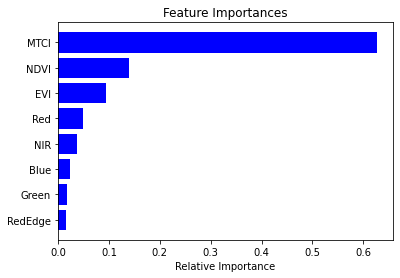

11130.995499800152  mean_squared_error
105.50353311524762  root_mean_squared_error
-0.1271619113451139  r2_score
{   'MSE': 11130.995499800152,
    'RMSE': 105.50353311524762,
    'R2 Score': -0.1271619113451139}
[array([RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=0),
       11130.995499800152, 105.50353311524762, -0.1271619113451139,
       {'MSE': 11130.995499800152, 'RMSE': 105.50353311524762, 'R2 Score': -0.1271619113451139},
       datetime.datetime(2021, 5, 11, 11, 10, 46, 869901),
       Index(['Blue', 'Green', 'Red', 'RedEdge', 'NIR', 'NDVI', 'MTCI', 'EVI'], dtype='object'),
       array([0., 0., 0., 0., 0., 0., 0., 0.]), 'Median data only',
       'EVI included.', 'Robot_2020_median_fixed_rows dataset.',
       '(96, 114)', 'All data stacked as new columns.', 'Drop Plot_ID.',
       'GrainYield Target.', 'Converted dates to ordinal.',
       'Plot ID Dropped.',
       'Test train split. test_Size=0.

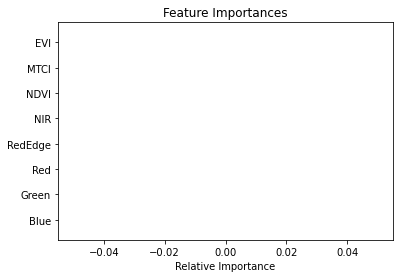

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    2.7s
[Parallel(n_jobs=6)]: Done 108 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    3.8s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-50.29611996197668
{'model__alpha': 7.0, 'model__solver': 'svd'}
Total time:  0.06516565084457397 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-3834.3483113899083
{'model__alpha': 1.0, 'model__solver': 'svd'}
Total time:  0.021300848325093588 minutes
neg_mean_squared_error
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-0.8991181939738405
{'model__alpha': 1.0, 'model__solver': 'svd'}
Total time:  0.02099459171295166 minutes
r2
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.6s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   21.7s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.1s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   47.2s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   59.2s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.5min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-49.33198224195268
{'model__alpha': 0.6000000000000001, 'model__max_iter': 400, 'model__selection': 'cyclic'}
Total time:  1.5343698501586913 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   11.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   19.4s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   29.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.5s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   52.3s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.6min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-3743.916526686474
{'model__alpha': 0.6000000000000001, 'model__max_iter': 650, 'model__selection': 'random'}
Total time:  1.6455735206604003 minutes
neg_mean_squared_error
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.9s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.0s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   19.3s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   28.4s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   38.9s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   52.7s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.6min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117611.74970101417, tolerance: 96.68213365241961
  model = cd_fast.enet_coordinate_descent(
[Par

-0.8456708197661401
{'model__alpha': 0.1, 'model__max_iter': 50, 'model__selection': 'random'}
Total time:  1.629394284884135 minutes
r2
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3252 tasks      | elapsed:    6.4s
[Parallel(n_jobs=6)]: Done 7284 tasks      | elapsed:   14.2s
[Parallel(n_jobs=6)]: Done 12468 tasks      | elapsed:   25.7s
[Parallel(n_jobs=6)]: Done 18804 tasks      | elapsed:   39.6s
[Parallel(n_jobs=6)]: Done 26292 tasks      | elapsed:   59.0s
[Parallel(n_jobs=6)]: Done 34932 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 44724 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 67764 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 81012 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 95412 tasks      | elapsed:  3.4min
[Parallel(n_jobs=6)]: Done 110964 tasks      | elapsed:  3.9min
[Parallel(n_jobs=6)]: Done 127668 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 145524 tasks      | elapsed:  5.2min
[Parallel(n_jobs=6)]: Done 161190 out of 161190 | elapse

-50.29104461668186
{'model__alpha': 0.1, 'model__l1_ratio': 0.1, 'model__max_iter': 150}
Total time:  5.751443262894949 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.2s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   13.8s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   20.5s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   27.9s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   37.0s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   47.3s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:   58.6s
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-3840.059990110246
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 200}
Total time:  5.546976904074351 minutes
neg_mean_squared_error
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    7.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   12.7s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   19.7s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   28.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   37.5s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   47.2s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:   57.6s
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-0.9061214688099849
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 250}
Total time:  5.617128038406372 minutes
r2
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-47.817585318125495
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 5}
Total time:  0.006345494588216146 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-3523.4783408427306
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 5}
Total time:  0.006289422512054443 minutes
neg_mean_squared_error
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-0.7800138640372956
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 5}
Total time:  0.0063448786735534664 minutes
r2
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.4s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.6s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-50.6189341395057
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 0.09999999999999999, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.30042601029078164 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.6s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   10.2s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   16.9s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   19.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-3918.644830300052
{'model__alpha_1': 1.0, 'model__alpha_2': 1e-06, 'model__lambda_1': 1e-06, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.320946458975474 minutes
neg_mean_squared_error
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.4s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.4s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.6s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-0.9431148535427244
{'model__alpha_1': 1.0, 'model__alpha_2': 1e-06, 'model__lambda_1': 0.01, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.30062615871429443 minutes
r2
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.9s finished


-50.36070590193573
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 1e-06, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06771658658981324 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.8s finished


-4057.8100892650573
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 1e-06, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06587016582489014 minutes
neg_mean_squared_error
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    4.0s finished


-1.0047844703306208
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 1e-06, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06816068092981974 minutes
r2
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 720 tasks      | elapsed:   10.5s
[Parallel(n_jobs=6)]: Done 1032 tasks      | elapsed:   15.8s
[Parallel(n_jobs=6)]: Done 1530 tasks      | elapsed:   29.2s
[Parallel(n_jobs=6)]: Done 1789 out of 1800 | elapsed:   42.3s remaining:    0.2s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   42.7s finished


-45.41036495480905
{'model__loss': 'squared_loss', 'model__max_trials': 401, 'model__min_samples': 60.0}
Total time:  0.7162825663884481 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 684 tasks      | elapsed:   10.5s
[Parallel(n_jobs=6)]: Done 1188 tasks      | elapsed:   19.0s
[Parallel(n_jobs=6)]: Done 1674 tasks      | elapsed:   34.9s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   41.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-3171.5276974938065
{'model__loss': 'squared_loss', 'model__max_trials': 1, 'model__min_samples': 80.0}
Total time:  0.6949450095494588 minutes
neg_mean_squared_error
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 720 tasks      | elapsed:   10.4s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:   15.5s
[Parallel(n_jobs=6)]: Done 1536 tasks      | elapsed:   27.7s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   41.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-0.5381303635117227
{'model__loss': 'squared_loss', 'model__max_trials': 101, 'model__min_samples': 50.0}
Total time:  0.6905596653620402 minutes
r2
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    7.9s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:    9.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-49.5784829730065
{'model__alpha': 0.001, 'model__epsilon': 14500.0}
Total time:  0.1619510054588318 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    7.6s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:    9.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-3780.448689244392
{'model__alpha': 0.001, 'model__epsilon': 14500.0}
Total time:  0.15577459732691448 minutes
neg_mean_squared_error
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    7.1s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:    8.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-0.8925059885024738
{'model__alpha': 0.01, 'model__epsilon': 15500.0}
Total time:  0.14591933091481527 minutes
r2
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3252 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done 7284 tasks      | elapsed:   13.2s
[Parallel(n_jobs=6)]: Done 12468 tasks      | elapsed:   22.6s
[Parallel(n_jobs=6)]: Done 18804 tasks      | elapsed:   35.6s
[Parallel(n_jobs=6)]: Done 26292 tasks      | elapsed:   49.2s
[Parallel(n_jobs=6)]: Done 34932 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 44724 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 67764 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 81012 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 95412 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 110964 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 127668 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 145524 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done 164532 tasks      | elapsed: 

-40.77264668788656
{'model__max_depth': 6, 'model__max_features': 3, 'model__min_samples_leaf': 6, 'model__min_samples_split': 21}
Total time:  6.293520092964172 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3252 tasks      | elapsed:    5.9s
[Parallel(n_jobs=6)]: Done 7284 tasks      | elapsed:   13.3s
[Parallel(n_jobs=6)]: Done 12468 tasks      | elapsed:   22.5s
[Parallel(n_jobs=6)]: Done 18804 tasks      | elapsed:   33.9s
[Parallel(n_jobs=6)]: Done 26292 tasks      | elapsed:   47.7s
[Parallel(n_jobs=6)]: Done 34932 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 44724 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 67764 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 81012 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 95412 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 110964 tasks      | elapsed:  3.4min
[Parallel(n_jobs=6)]: Done 127668 tasks      | e

-2828.0438855105117
{'model__max_depth': 71, 'model__max_features': 5, 'model__min_samples_leaf': 16, 'model__min_samples_split': 6}
Total time:  6.531809771060944 minutes
neg_mean_squared_error
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3252 tasks      | elapsed:    6.4s
[Parallel(n_jobs=6)]: Done 7284 tasks      | elapsed:   14.1s
[Parallel(n_jobs=6)]: Done 12468 tasks      | elapsed:   23.5s
[Parallel(n_jobs=6)]: Done 18804 tasks      | elapsed:   35.8s
[Parallel(n_jobs=6)]: Done 26292 tasks      | elapsed:   50.1s
[Parallel(n_jobs=6)]: Done 34932 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 44724 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 67764 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 81012 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 95412 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 110964 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 127668 tasks      | e

-0.3107810695712801
{'model__max_depth': 76, 'model__max_features': 6, 'model__min_samples_leaf': 16, 'model__min_samples_split': 36}
Total time:  6.564848347504934 minutes
r2
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 237 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    0.9s finished


-90.6742892572214
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.01716504096984863 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 237 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    0.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-14272.243561984811
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.017407302061716715 minutes
neg_mean_squared_error
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done 237 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    1.0s finished


-7.0215694254389405
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.01773975690205892 minutes
r2
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 86, n_neighbors = 91

In [35]:
%time

import time, datetime
from datetime import datetime as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

comments.append('Converted dates to ordinal.')
comments.append('Plot ID Dropped.')

comments.append('Test train split. test_Size=0.3, random_state=55')
cv = 10
core=6
verbos=5
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']

time_taken = []
t_start=time.time()

#==============================================================================
# Create separate train/test splits
#==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=5)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
#==============================================================================
# Training best performing models
#==============================================================================
#==============================================================================
# Finding out feature importance
#==============================================================================

model = RandomForestRegressor(n_estimators = 1000, max_depth=250, min_samples_split=5, random_state=0, n_jobs = -1)
model.fit(X_train, y_train)
# Finding feature importance
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)
# Running predictions
test_data_regression(model)
# Plotting feature importance
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



model = RandomForestRegressor(n_estimators = 50, max_depth=100, min_samples_split=400, random_state=0, n_jobs = -1)
model.fit(X_train, y_train)
# Finding feature importance
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)
# Running predictions
test_data_regression(model)
# Plotting feature importance
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



#==============================================================================
# Ridge
#==============================================================================
from sklearn.linear_model import Ridge
model = Ridge()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__alpha' : [x*1. for x in range(1,10)],
                  'model__solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# Lasso
#==============================================================================
from sklearn.linear_model import Lasso
model = Lasso()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__alpha' : [x*0.1 for x in range(1,10)],
                  'model__max_iter' : [x for x in range(50, 10000, 50)],
                  'model__selection' : ['cyclic','random']}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# ElasticNet
#==============================================================================
from sklearn.linear_model import ElasticNet
model = ElasticNet()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__alpha' : [x*0.1 for x in range(1,10)],
                  'model__max_iter' : [x for x in range(50, 10000, 50)],
                  'model__l1_ratio' : [x*0.1 for x in range(1,10)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# OrthogonalMatchingPursuit
#==============================================================================
from sklearn.linear_model import OrthogonalMatchingPursuit
model = OrthogonalMatchingPursuit()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__fit_intercept' : [True, False],
                  'model__n_nonzero_coefs' : [x for x in range(1,10)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# BayesianRidge
#==============================================================================
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__n_iter' : [x for x in range(5, 150, 10)],
                  'model__alpha_1' : [1.0],
                  'model__alpha_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_1' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_2' : [1.0]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# ARDRegression
#==============================================================================
from sklearn.linear_model import ARDRegression
model = ARDRegression()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__n_iter' : [x for x in range(5, 150, 10)],
                  'model__alpha_1' : [1.0],
#                       'model__alpha_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_1' : [0.01],
                  'model__lambda_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__verbose' : [True]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# RANSACRegressor
#==============================================================================
from sklearn.linear_model import RANSACRegressor
model = RANSACRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__min_samples' : [x/.1 for x in range(1, 10)],
                  'model__max_trials' : [x for x in range(1, 500,50)],
                  'model__loss' : ['absolute_loss', 'squared_loss']}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# TheilSenRegressor
#==============================================================================
# from sklearn.linear_model import TheilSenRegressor
# model = TheilSenRegressor()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__max_subpopulation' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
#                   'model__n_subsamples' : [x for x in range(9, 1300,50)],
#                   'model__max_iter' :  [x for x in range(50, 1000, 50)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)
#==============================================================================
# HuberRegressor
#==============================================================================
from sklearn.linear_model import HuberRegressor
model = HuberRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__epsilon' : [x/.01 for x in range(100, 200, 5)],
                  'model__alpha' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# DecisionTreeRegressor
#==============================================================================
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__max_depth' : [None]+[x for x in range(1, 100,5)],
                  'model__min_samples_leaf' : [x for x in range(1, 50,5)],
                  'model__min_samples_split' : [2]+[x for x in range(1, 50,5)],
                  'model__max_features' : [x for x in range(1, 10)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# GaussianProcessRegressor
#==============================================================================
from sklearn.gaussian_process import GaussianProcessRegressor
model = GaussianProcessRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__kernel' : [None]+['rbf', 'sigmoid',  'linear', 'poly'],
                  'model__alpha' : [x*0.0000000001 for x in [1,10,100,1000,10000,100000,1000000]]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# KNeighborsRegressor
#==============================================================================
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__n_neighbors' : [x for x in range(1, 100,5)],
                  'model__weights' : ['uniform', 'distance'],
                  'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'model__leaf_size' : [x for x in range(10, 50, 5)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
# #==============================================================================
# # RadiusNeighborsRegressor
# #==============================================================================
# from sklearn.neighbors import RadiusNeighborsRegressor
# model = RadiusNeighborsRegressor()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__radius' : [x*1. for x in range(1, 10)],
#                   'model__weights' : ['uniform', 'distance'],
#                   'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                   'model__p' : [x for x in range(1, 10)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)
# #==============================================================================
# # RandomForestRegressor
# #==============================================================================
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__radius' : [x*1. for x in range(1, 10)],
#                   'model__weights' : ['uniform', 'distance'],
#                   'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                   'model__p' : [x for x in range(1, 10)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)
# #==============================================================================
# # SVR
# #==============================================================================
# from sklearn.svm import SVR
# model = SVR()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__radius' : [x*1. for x in range(1, 10)],
#                   'model__weights' : ['uniform', 'distance'],
#                   'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                   'model__p' : [x for x in range(1, 10)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)

t_end = time.time()
tt = t_end - t_start
time_taken.append(tt)
print('Total time complete: ', (tt) / 60, 'minutes')


## More models to try

In [64]:
%time

import time, datetime
from datetime import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

comments.append('Converted dates to ordinal.')
comments.append('Plot ID Dropped.')

comments.append('Test train split. test_Size=0.3, random_state=55')
cv = 10
core=6
verbos=5
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']


#==============================================================================
# GradientBoostingRegressor
#==============================================================================
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__loss' : ['ls', 'lad', 'huber', 'quantile'],
# #                   'model__learning_rate' : [0.001, 0.01, 0.1, 1],
# #                   'model__n_estimators' : range(0,500, 100),
                  
# #                   'model__max_depth':range(5,16,2), 
# #                   'model__min_samples_split':range(200,1100, 200), # 2100
# #                   'model__min_samples_leaf':range(30,71,10),
#                   'model__max_features':range(7,20,2),
#                   'model__subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}]

param_grid   =  [{'model__loss' : ['huber'],
#                   'model__learning_rate' : [0.001, 0.01, 0.1, 1],
#                   'model__n_estimators' : range(0,500, 100),
                  
                  'model__max_depth':range(5,16,2), 
#                   'model__min_samples_split':range(2,5), # 2100
#                   'model__min_samples_leaf':range(1,2),
#                   'model__max_features':range(5,6),
                  'model__subsample':[0.7,0.8]}]
# pipe.get_params()
estimator = pipe

for score in scores:
    grid(Xtrain = X.values,
                ytrain = y.values,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:   12.7s
[Parallel(n_jobs=6)]: Done 120 out of 120 | elapsed:   28.2s finished


-46.717480315136996
{'model__loss': 'huber', 'model__max_depth': 5, 'model__subsample': 0.7}
Total time:  0.47979431549708046 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:   12.0s
[Parallel(n_jobs=6)]: Done 120 out of 120 | elapsed:   28.4s finished


-3579.2473516201994
{'model__loss': 'huber', 'model__max_depth': 15, 'model__subsample': 0.7}
Total time:  0.49063383738199867 minutes
neg_mean_squared_error
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:   13.1s
[Parallel(n_jobs=6)]: Done 120 out of 120 | elapsed:   29.1s finished


-0.6330201429311257
{'model__loss': 'huber', 'model__max_depth': 5, 'model__subsample': 0.8}
Total time:  0.49445970058441163 minutes
r2


In [32]:
%time

import time, datetime
from datetime import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

comments.append('Converted dates to ordinal.')
comments.append('Plot ID Dropped.')
comments.append('Test train split. test_Size=0.3, random_state=55')
cv = 5
core=6
verbos=5
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']

#==============================================================================
# RandomForestRegressor
#==============================================================================
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {
#     'model__n_estimators': n_estimators,
               'model__max_features': max_features,
               'model__max_depth': max_depth,
               'model__min_samples_split': min_samples_split,
               'model__min_samples_leaf': min_samples_leaf,
               'model__bootstrap': bootstrap}


estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

Wall time: 0 ns
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:    5.9s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    9.8s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:   15.8s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   25.5s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:   35.8s
[Parallel(n_jobs=6)]: Done 870 tasks      | elapsed:   48.6s
[Parallel(n_jobs=6)]: Done 1140 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 1446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 2160 out of 2160 | elapsed:  2.2min finished


-44.214065043928905
{'model__bootstrap': False, 'model__max_depth': 110, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2}
Total time:  2.173795998096466 minutes
neg_mean_absolute_error
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    8.4s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:   14.5s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   22.7s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:   32.7s
[Parallel(n_jobs=6)]: Done 870 tasks      | elapsed:   47.4s
[Parallel(n_jobs=6)]: Done 1140 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 1446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 2160 out of 2160 | elapsed:  2.1min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-3020.381517242362
{'model__bootstrap': True, 'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5}
Total time:  2.093098441759745 minutes
neg_mean_squared_error
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    9.5s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:   16.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   24.8s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:   37.5s
[Parallel(n_jobs=6)]: Done 870 tasks      | elapsed:   50.4s
[Parallel(n_jobs=6)]: Done 1140 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 1446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 2160 out of 2160 | elapsed:  2.1min finished


0.16173636699258503
{'model__bootstrap': True, 'model__max_depth': 100, 'model__max_features': 'auto', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2}
Total time:  2.0905689160029093 minutes
r2


In [ ]:
%time

import time, datetime
from datetime import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

comments.append('Converted dates to ordinal.')
comments.append('Plot ID Dropped.')
comments.append('Test train split. test_Size=0.3, random_state=55')
cv = 5
core=6
verbos=5
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']

#==============================================================================
# RandomForestRegressor
#==============================================================================
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {
    'model__n_estimators': n_estimators,
               'model__max_features': max_features,
               'model__max_depth': max_depth,
               'model__min_samples_split': min_samples_split,
               'model__min_samples_leaf': min_samples_leaf,
               'model__bootstrap': bootstrap}


estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

Wall time: 0 ns
Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    1.9s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:   42.5s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  4.8min
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:  6.2min
[Parallel(n_jobs=6)]: Done 870 tasks      | elapsed:  7.7min
[Parallel(n_jobs=6)]: Done 1140 tasks      | elapsed: 11.0min
[Parallel(n_jobs=6)]: Done 1446 tasks      | elapsed: 13.9min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 16.3min
[Parallel(n_jobs=6)]: Done 2166 tasks      | elapsed: 20.8min
[Parallel(n_jobs=6)]: Done 2580 tasks      | elapsed: 24.0min
[Parallel(n_jobs=6)]: Done 3030 tasks      | elapsed: 28.6min
[Parallel(n_jobs=6)]: Done 3516 tasks      | elapsed: 32.6min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 38.4min
[P

In [ ]:
X.shape

# Permutation importance

In [ ]:


# PERMUTATION

from sklearn.inspection import permutation_importance


result = permutation_importance(gs_xgb_fitted, X_test, y_test, n_repeats=100, random_state=0)

# ==================================
# Feature selection
# ===================================

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

# Plot importances
fig, ax = plt.subplots(figsize=(25, 25))
ind = indices = np.argsort(result.importances_mean)[::-1]
plt.barh(X_test.columns, result.importances_mean[ind])
plt.show()


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}
grid_search_rfc = GridSearchCV(rfc, param_grid = grid_values, scoring = scoring, refit='f1')
grid_search_rfc.fit(x_train, y_train)

grid_search_rfc.best_params_
grid_search_rfc.cv_results_

# cv_results[‘mean_test_<metric_name>’]
grid_search_rfc.cv_results_['mean_test_recall']
